# About Dataset

## Bank Customer Segmentation
Most banks have a large customer base - with different characteristics in terms of age, income, values lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.

According to a report from Ernst & Young, “A more granular understanding of consumers is no longer nice-to-have item, but a strategic and competitive imperative for banking providers. Customer understanding should be a living, breathing part of everyday business, with insights underpinning the full range of banking operations.

## About this Dataset
This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India. The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction, transaction details, transaction amount, etc.

Link: https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation/code?datasetId=1672910&sortBy=voteCount

## Interesting Analysis Ideas
The dataset can be used for different analysis, example -

1. Perform Clustering / Segmentation on the dataset and identify popular customer groups along with their definitions/rules
2. Perform Location-wise analysis to identify regional trends in India
3. Perform transaction-related analysis to identify interesting trends that can be used by a bank to improve / optimize their user experiences
4. Customer Recency, Frequency, Monetary analysis
5. Network analysis or Graph analysis of customer data.

# EDA

## Import required modules

In [42]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import and display the data

In [43]:
df = pd.read_csv('data/bank_transactions.csv')
df.head(20)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


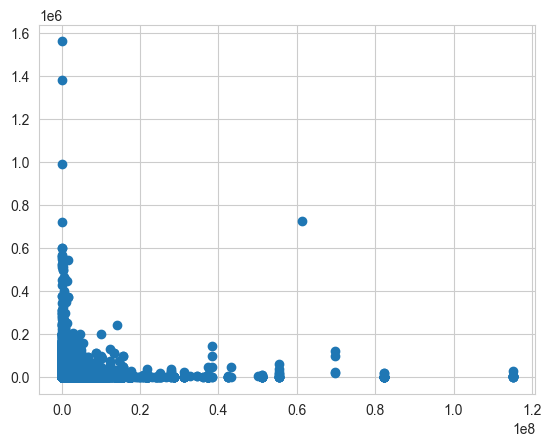

In [44]:
plt.scatter(df['CustAccountBalance'], df['TransactionAmount (INR)'])
plt.show()

## Data Checks to perform
Check Missing values
Check Duplicates
Check data type
Check the number of unique values of each column
Check statistics of data set
Check various categories present in the different categorical column

## Missing Values

In [45]:
df.shape

(1048567, 9)

In [46]:
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [47]:
df.dropna(inplace=True)

In [48]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

## Check duplicates

In [49]:
df.duplicated().sum()

0

## Check Datatypes

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.5+ MB


## Check Unique Values

In [51]:
df.nunique()

TransactionID              1041614
CustomerID                  879358
CustomerDOB                  17233
CustGender                       3
CustLocation                  9275
CustAccountBalance          160723
TransactionDate                 55
TransactionTime              81855
TransactionAmount (INR)      92391
dtype: int64

## Statistics

In [52]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.571221e+05,1.566096e+03
std,8.467609e+05,5.126352e+04,6.561464e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.240410e+05,1.600000e+02
50%,1.676852e+04,1.642470e+05,4.575000e+02
75%,5.742885e+04,2.000220e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


## Cleaning

## change dob and transaction date dtypes

In [53]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.5+ MB


In [55]:
df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
 9   CustomerAge              1041614 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 87.4+ MB


In [57]:
df['CustGender'].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [58]:
df.drop(df[df['CustGender'] == 'T'].index, inplace=True)

## Manipulating locations

In [59]:
list(df['CustLocation'].unique())

['JAMSHEDPUR',
 'JHAJJAR',
 'MUMBAI',
 'NAVI MUMBAI',
 'ITANAGAR',
 'GURGAON',
 'MOHALI',
 'GUNTUR',
 'AHMEDABAD',
 'THANE',
 'PUNE',
 'NEW DELHI',
 'NO 3 KALYANI NAGAR PUNE',
 'SECUNDERABAD',
 'WAYS PANCHKUVA AHMEDABAD',
 'LUCKNOW',
 'DELHI',
 'CHENNAI',
 'GHAZIABAD',
 'BANGALORE',
 'GUWAHATI',
 'DHANBAD',
 'MUKTSAR',
 'SOCORRO',
 'ANDHERI (EAST) MUMBAI',
 'AURANGABAD',
 'KOTA',
 'JAIPUR',
 'K V RANGAREDDY',
 'MUZAFFARNAGAR',
 'BURDWAN',
 'LUDHIANA',
 'NOIDA',
 'AGRA',
 'SHAHJAHANPUR',
 'DIST RAIGAD PANVEL',
 'DEHRADUN',
 'HYDERABAD',
 'GODDA',
 'REWARI (HARYANA)',
 'NELLORE',
 'ADIPUR',
 'DUBAI',
 'ALLAHABAD',
 'BATHINDA',
 'NASHIK',
 'JAMMU',
 'JABALPUR',
 'KASHIPUR',
 'ETAH',
 'KOLKATA',
 'VADODARA',
 'TIRUPUR',
 'SURAT',
 'NAGO THANE',
 'KARUR DT',
 'CHITTO0R',
 'INDORE',
 'OFF CUBBON ROAD BANGALORE',
 'PIMPALI',
 'PUMP HINJEWADI PUNE',
 'KANJURMARG EAST',
 'SOUTH 24 PARGANAS',
 'MIRABHAYANDER THANE MIRA ROAD',
 'SAHARANPUR',
 'CHANDIGARH',
 'COMPLEX GURGAON',
 'PARK PHASE-I HINJE

pune, ahmedabad, MUMBAI, BANGALORE, DELHI, RAJKOT, THANE, CHENNAI, COIMBATORE, JAIPUR

In [60]:
df.replace(r'(.*HYDERABAD.*)','HYDERABAD',regex=True, inplace = True)
df.replace(r'(.*PUNE.*)','PUNE',regex=True, inplace = True)
df.replace(r'(.*AHMEDABAD.*)','AHMEDABAD',regex=True, inplace = True)
df.replace(r'(.*MUMBAI.*)','MUMBAI',regex=True, inplace = True)
df.replace(r'(.*BANGALORE.*)','BANGALORE',regex=True, inplace = True)
df.replace(r'(.*DELHI.*)','DELHI',regex=True, inplace = True)
df.replace(r'(.*RAJKOT.*)','RAJKOT',regex=True, inplace = True)
df.replace(r'(.*THANE.*)','THANE',regex=True, inplace = True)
df.replace(r'(.*CHENNAI.*)','CHENNAI',regex=True, inplace = True)
df.replace(r'(.*COIMBATORE.*)','COIMBATORE',regex=True, inplace = True)
df.replace(r'(.*JAIPUR.*)','JAIPUR',regex=True, inplace = True)
df.replace(r'(.*KOLKATA.*)','KOLKATA',regex=True, inplace = True)

In [61]:
df['CustLocation'].value_counts()

DELHI                             157192
MUMBAI                            133119
BANGALORE                          89160
GURGAON                            73594
NOIDA                              32656
                                   ...  
PRABHANI                               1
NEAR SRIYA SQUARE BHUBANESHWAR         1
SHIMOGA  DIST                          1
PERTH                                  1
KARANJIA                               1
Name: CustLocation, Length: 5849, dtype: int64

In [62]:
df['CustLocation'].unique()

array(['JAMSHEDPUR', 'JHAJJAR', 'MUMBAI', ..., 'CUTTACK CUTTACK',
       'IRVINE', 'KARANJIA'], dtype=object)

In [63]:
cdf = df.drop(columns=['TransactionTime'])
cdf.to_csv('data/cleaned_data.csv', index=False)

In [64]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-02-08,181156,1762.5,28


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041613 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041613 non-null  object        
 1   CustomerID               1041613 non-null  object        
 2   CustomerDOB              1041613 non-null  datetime64[ns]
 3   CustGender               1041613 non-null  object        
 4   CustLocation             1041613 non-null  object        
 5   CustAccountBalance       1041613 non-null  float64       
 6   TransactionDate          1041613 non-null  datetime64[ns]
 7   TransactionTime          1041613 non-null  int64         
 8   TransactionAmount (INR)  1041613 non-null  float64       
 9   CustomerAge              1041613 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 87.4+ MB


In [65]:
kbkvb

NameError: name 'kbkvb' is not defined

## RFM Analysis

In [ ]:
df['TransactionDate'].max()

In [ ]:
df['TransactionDate1']=df['TransactionDate']

In [ ]:
rfm_df = df.groupby('CustomerID').agg(
    {
        "TransactionDate1":"max",
        "TransactionID" : "count",
        "TransactionAmount (INR)" : "sum",
    }
)
rfm_df.reset_index()
rfm_df.head()

In [ ]:
rfm_df.shape

In [ ]:
rfm_df['Recency'] = df['TransactionDate'].max() - rfm_df['TransactionDate1']
rfm_df['Recency'] = rfm_df['Recency'].dt.days
rfm_df.drop('TransactionDate1', axis=1, inplace=True)
rfm_df.columns = ['Frequency', 'Monetary', 'Recency']
rfm_df.head()

In [ ]:
rfm_df['r_quartile'] = pd.qcut(rfm_df['Recency'], 5, [5, 4, 3, 2, 1])
rfm_df['m_quartile'] = pd.qcut(rfm_df['Monetary'], 5, [1, 2, 3, 4, 5])
rfm_df

In [ ]:
rfm_df['rfm_score'] = rfm_df.r_quartile.astype(str)+ rfm_df.Frequency.astype(str) + rfm_df.m_quartile.astype(str)
rfm_df['rfm_score'] = rfm_df['rfm_score'].astype(int)
rfm_df.head()

### Most Valuable Customers

In [ ]:
rfm_df.sort_values('rfm_score', ascending=False)[rfm_df['rfm_score'] >= 444]

In [ ]:
rfm = rfm_df.loc[:, ['Recency', 'Frequency', 'Monetary']]
cust_id = rfm.index
cust_id

In [ ]:
rfm.head()

## Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled

## KMeans Clustering

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
clusters = 10
inertia = []
sil_score = []
km = []

for k in range(2, clusters):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    km.append(kmeans)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
    sil = silhouette_score(rfm_scaled, kmeans.labels_, sample_size=50000)
    sil_score.append(sil)

plt.grid()
plt.plot(range(2, clusters), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
plt.plot(range(2, clusters), sil_score)
plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init="k-means++")
kmeans.fit(rfm_scaled)
silhouette_score(rfm_scaled, kmeans.labels_, sample_size=50000)

In [ ]:
type(rfm_scaled)

In [ ]:
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['R', 'F', 'M'])
rfm_scaled['labels'] = kmeans.labels_
rfm_scaled

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(rfm_scaled['R'], rfm_scaled['F'], rfm_scaled['M'], c=rfm_scaled['labels'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.zlabel('Monetary')
plt.legend()
plt.show()

In [ ]:
plt.scatter(rfm_scaled['M'], rfm_scaled['R'], c=rfm_scaled['labels'])
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.show()

In [ ]:
plt.scatter(rfm_scaled['M'], rfm_scaled['F'], c=rfm_scaled['labels'])
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.scatter(rfm_scaled['F'], rfm_scaled['R'], c=rfm_scaled['labels'])
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.show()

In [ ]:
for c in range(5):
    plt.scatter(rfm_scaled[ rfm_scaled['labels'] == c]['R'], rfm_scaled[ rfm_scaled['labels'] == c]['M'])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')

plt.show()

In [ ]:
efverve

# Location wise analysis

1. age
2. gender
3. transaction volume
4. transaction frequency

In [ ]:
df.head()

In [ ]:
df.drop(columns=['CustomerDOB', 'TransactionDate1'], inplace=True)
df.head()

In [ ]:
df['CustLocation'].unique()

In [ ]:
df['T1'] = df['TransactionAmount (INR)']

In [ ]:
loc_df = df.groupby('CustLocation').agg(
    {
        'CustomerAge': 'mean',
        'TransactionAmount (INR)': 'mean',
        'T1': 'count'
    }
)
loc_df.reset_index()
loc_df